## Data Preprocessing

In [3]:
import numpy as np

In [4]:
import pandas as pd
import seaborn as sns

### EDD 

In [5]:
df = pd.read_csv('Data-Files/data1/House_Price.csv',header=0)

In [6]:
df.head(5)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [7]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [8]:
df.shape

(506, 19)

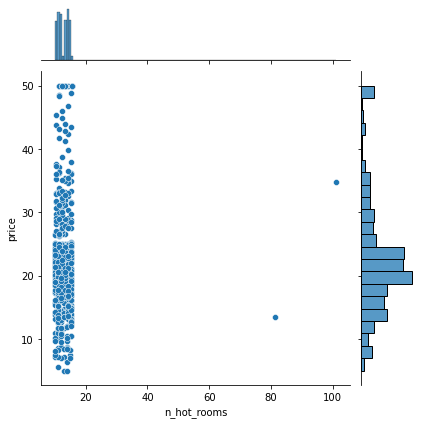

In [9]:
#for non categorical variable we prefer jointplot
sns.jointplot(x="n_hot_rooms", y="price", data=df)

<AxesSubplot:xlabel='airport', ylabel='count'>

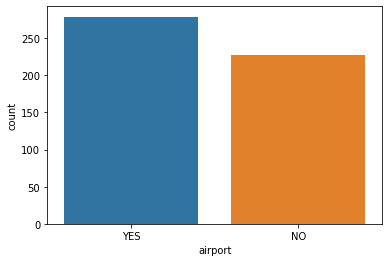

In [10]:
#for categorical variable we prefer countplot
sns.countplot(x='airport',data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

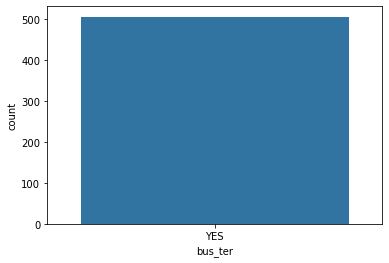

In [11]:
sns.countplot(x='bus_ter',data=df)

### Above Observation
1. Outliers in some of the variable
2. Bus_Ter has only one value yes


### Outlier 

In [12]:
# to check the oulier we can plot sns.jointplot
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [13]:
#calculating 99 percentile value
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [14]:
#for fetching the first value of percentile
np.percentile(df.n_hot_rooms,[99])[0]

15.39952

In [15]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [16]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [17]:
# now limitting the values of n_hot_rooms of 101 and 81
df[(df.n_hot_rooms>3*uv)] = 3*uv

In [18]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.198560
166,50.00000,2.01019,49.58000,0.60500,7.92900,96.20000,2.11000,1.91000,2.31000,1.86000,25.30000,3.70000,YES,8.30000,15.40000,River,37.00000,YES,0.052105
204,50.00000,0.02009,32.68000,0.41610,8.03400,31.90000,5.41000,4.80000,5.28000,4.99000,25.30000,2.88000,YES,8.90000,15.40000,River,51.00000,YES,0.044178
267,50.00000,0.57834,33.97000,0.57500,8.29700,67.00000,2.60000,2.13000,2.43000,2.52000,27.00000,7.44000,YES,8.00000,15.40000,None,42.00000,YES,0.063235
369,50.00000,5.66998,48.10000,0.63100,6.68300,96.80000,1.55000,1.28000,1.65000,0.94000,19.80000,3.73000,YES,6.70000,15.40000,River,58.00000,YES,0.067477
423,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.198560


In [19]:
np.percentile(df.rainfall,[1])[0]

20.0

In [20]:
lv = np.percentile(df.rainfall,[1])[0]

In [21]:
df[(df.rainfall<lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3.0,YES,0.044019


In [22]:
df.rainfall[(df.rainfall<0.3*lv)] = 0.3*lv

<ipython-input-22-211d44c7fcb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall<0.3*lv)] = 0.3*lv


In [23]:
df[(df.rainfall<lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6.0,YES,0.044019


### Missing Value Imputation

In [24]:
#n_hos bed have missing we can check by info func
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [25]:
df.info()
#to fill missing value for all column
df =df.fillna(df.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    float64
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

<ipython-input-25-311352d28a8e>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df =df.fillna(df.mean())


### Transform variable

In [26]:
df.crime_rate = np.log(1+df.crime_rate)

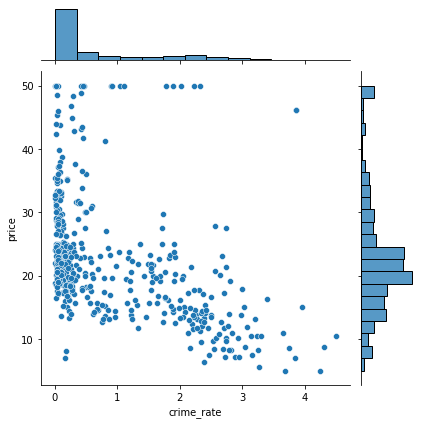

In [27]:
sns.jointplot(x='crime_rate',y='price',data=df)

In [28]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [29]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.616397,0.824478,41.151062,0.735158,6.440977,68.468571,4.140548,3.798216,4.128749,3.788058,21.644065,12.781674,8.053854,12.864050,39.237939,0.236841,3.963893
std,9.277130,1.038292,6.858349,2.869097,2.603248,28.172303,3.386717,3.403630,3.394607,3.398326,2.660338,7.420480,2.816196,2.688778,12.496573,2.898201,3.393841
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,1.127500
25%,17.100000,0.079058,35.190000,0.449000,5.885500,45.025000,2.270000,1.942500,2.232500,1.942500,19.800000,7.037500,6.659000,11.189800,28.000000,0.046487,2.103125
50%,21.200000,0.231444,39.690000,0.538000,6.209000,77.150000,3.395000,3.045000,3.380000,3.095000,21.000000,11.395000,8.027000,12.720000,40.000000,0.053548,3.216250
75%,25.000000,1.545301,48.100000,0.624000,6.628000,94.075000,5.417500,5.022500,5.427500,5.010000,22.925000,17.057500,9.088000,14.170800,50.000000,0.061453,5.216875
max,50.000000,4.499545,57.740000,46.198560,46.198560,100.000000,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,60.000000,46.198560,46.198560


In [30]:
del df['dist1']


In [31]:
del df['dist2']

In [32]:
del df['dist3']

In [33]:
del df['dist4']

In [34]:
del df['bus_ter']

In [35]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.00000,0.006300,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,YES,5.48000,11.19200,River,23.00000,0.049347,4.08750
1,21.60000,0.026944,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,NO,7.33200,12.17280,Lake,42.00000,0.046146,4.96750
2,46.19856,3.854363,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.198560,46.19856
3,33.40000,0.031857,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,YES,9.26800,11.26720,Lake,45.00000,0.047151,6.06500
4,36.20000,0.066770,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,NO,8.82400,11.28960,Lake,55.00000,0.039474,6.06250


### Dummy Variable - created to use categorical for regression

In [36]:
df = pd.get_dummies(df)

In [37]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,...,parks,avg_dist,airport_46.19856,airport_NO,airport_YES,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.00000,0.006300,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,5.48000,11.19200,...,0.049347,4.08750,0,0,1,0,0,0,0,1
1,21.60000,0.026944,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,7.33200,12.17280,...,0.046146,4.96750,0,1,0,0,1,0,0,0
2,46.19856,3.854363,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,...,46.198560,46.19856,1,0,0,1,0,0,0,0
3,33.40000,0.031857,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,9.26800,11.26720,...,0.047151,6.06500,0,0,1,0,1,0,0,0
4,36.20000,0.066770,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,8.82400,11.28960,...,0.039474,6.06250,0,1,0,0,1,0,0,0


In [38]:
del df['airport_NO']

In [39]:
del df['waterbody_None']

### Correlation

In [40]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_46.19856,airport_YES,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.420983,-0.468976,0.143113,0.339334,-0.379976,0.498653,-0.654315,0.193389,0.134055,-0.042430,0.158878,0.276962,0.160287,0.170523,0.160287,0.036398,-0.040929,0.063907
crime_rate,-0.420983,1.000000,0.655763,0.211913,0.101115,0.539752,-0.203608,0.624286,0.154680,0.188038,0.089224,0.186304,-0.212209,0.184008,-0.144291,0.184008,-0.036451,0.004632,-0.067224
resid_area,-0.468976,0.655763,1.000000,0.077144,-0.060507,0.640626,-0.283355,0.590164,0.042261,0.022108,0.059024,0.048994,-0.401580,0.046407,-0.117746,0.046407,-0.032834,0.050822,-0.100574
air_qual,0.143113,0.211913,0.077144,1.000000,0.958961,-0.020327,0.575358,0.306571,0.852347,0.781633,0.038836,0.999314,0.764831,0.999185,-0.072786,0.999185,-0.032451,-0.024877,-0.048917
room_num,0.339334,0.101115,-0.060507,0.958961,1.000000,-0.112533,0.638300,0.115027,0.827075,0.749970,0.016309,0.962732,0.789748,0.963016,-0.022444,0.963016,-0.029874,-0.021438,-0.032766
age,-0.379976,0.539752,0.640626,-0.020327,-0.112533,1.000000,-0.240759,0.562745,-0.053527,-0.032978,0.073773,-0.047380,-0.502011,-0.049846,0.009286,-0.049846,0.002331,-0.002824,-0.085691
teachers,0.498653,-0.203608,-0.283355,0.575358,0.638300,-0.240759,1.000000,-0.125234,0.493991,0.434953,-0.017950,0.581444,0.573229,0.582001,0.014960,0.582001,0.024977,-0.053373,0.048496
poor_prop,-0.654315,0.624286,0.590164,0.306571,0.115027,0.562745,-0.125234,1.000000,0.209094,0.231694,0.071204,0.285896,-0.071648,0.283964,-0.110708,0.283964,-0.012539,0.012835,-0.117958
n_hos_beds,0.193389,0.154680,0.042261,0.852347,0.827075,-0.053527,0.493991,0.209094,1.000000,0.667232,0.060122,0.853942,0.661266,0.854084,-0.062724,0.854084,-0.004254,0.008815,-0.078669
n_hot_rooms,0.134055,0.188038,0.022108,0.781633,0.749970,-0.032978,0.434953,0.231694,0.667232,1.000000,0.064763,0.781831,0.604960,0.781751,-0.055338,0.781751,-0.024477,0.014755,-0.064096


In [41]:
del df['parks']

In [42]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_46.19856,airport_YES,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.00000,0.006300,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,5.48000,11.19200,23.00000,4.08750,0,1,0,0,0,1
1,21.60000,0.026944,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,7.33200,12.17280,42.00000,4.96750,0,0,0,1,0,0
2,46.19856,3.854363,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,1,0,1,0,0,0
3,33.40000,0.031857,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,9.26800,11.26720,45.00000,6.06500,0,1,0,1,0,0
4,36.20000,0.066770,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,8.82400,11.28960,55.00000,6.06250,0,0,0,1,0,0


In [43]:
import statsmodels.api as sn

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [44]:
x = sn.add_constant(df['room_num'])
lm = sn.OLS(df['price'], x).fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     65.59
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           4.22e-15
Time:                        13:09:17   Log-Likelihood:                -1813.7
No. Observations:                 506   AIC:                             3631.
Df Residuals:                     504   BIC:                             3640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8275      1.037     14.296      0.000      12.790      16.865
room_num       1.2093      0.149      8.099      0.000       0.916       1.503
==============================================================================
Omnibus:                       80.832   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.686
Skew:                           0.975   Prob(JB):                     5.67e-30
Kurtosis:                       4.609   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
import numpy as np

In [62]:
y = df['price']

In [49]:
x = df[['room_num']]

In [50]:
lm2 = LinearRegression()

In [51]:
lm2.fit(x,y)

LinearRegression()

In [52]:
print(lm2.intercept_,lm2.coef_)

14.82749006653546 [1.2092743]


In [63]:
lm2.predict(x)

array([22.77846862, 22.59224038, 70.69422158, 23.28999165, 23.47017352,
       22.60312384, 22.09764719, 22.29113107, 21.63691368, 22.08797299,
       22.53903231, 22.09401936, 21.94890645, 22.0214629 , 22.19922623,
       21.88239636, 22.00453306, 22.07104315, 21.42529067, 21.75300401,
       21.56314794, 22.04081129, 22.25485284, 21.8570016 , 21.99123105,
       21.5982169 , 21.8570016 , 22.13997179, 22.68172667, 22.89818677,
       21.73607417, 22.17020364, 22.02267218, 21.72156288, 22.19922623,
       22.00211452, 21.89086128, 21.90174475, 22.04202057, 22.8026541 ,
       23.32143278, 23.01427711, 22.28750325, 22.33829277, 22.16657582,
       21.69858666, 21.82435119, 22.11941412, 21.35636204, 21.60184472,
       22.03839274, 22.22220244, 22.70107506, 22.08071735, 21.94769717,
       23.5935195 , 22.54628795, 23.06990373, 22.25848067, 21.99485887,
       21.76993385, 22.04202057, 22.63456498, 23.00460291, 23.41817473,
       22.43382544, 21.82556047, 21.93560443, 21.59217053, 21.94

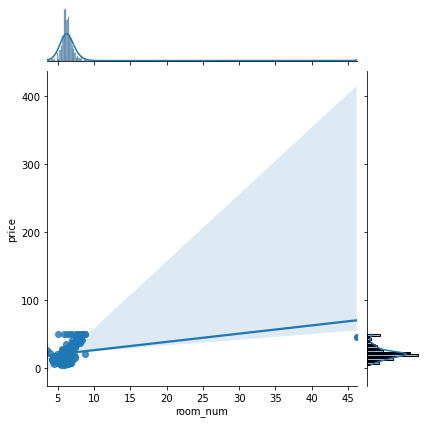

In [61]:
sns.jointplot(x=df['room_num'],y=df['price'],data=df,kind='reg')